## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 10 : Algoritma Hierarki </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
import datetime
import uuid

myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-05-04 10:25:54.664014
Device ID: 	60c91f13-ea2b-11ed-ab2f-088fc3234331



---

### Dataset yang dipakai:

1. Sample Sales Data – sumber : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data
2. Diabetes Dataset – sumber : https://www.kaggle.com/datasets/mathchi/diabetes-data-set

---

### Hasil kerja

### Hierarchical Clustering : Agglomerative Clustering

#### Importing Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset

In [3]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin')

In [4]:
df.shape

(2823, 25)

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


#### Check & Handling missing value

In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
modes = df['TERRITORY'].mode().iloc[0]
df['TERRITORY'].fillna(modes, inplace=True)

In [10]:
df['TERRITORY'].isnull().sum()

0

In [11]:
numerical = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
categorical= ['STATUS', 'QTR_ID', 'YEAR_ID', 'PRODUCTLINE', 'TERRITORY', 'DEALSIZE']
unused = ['ORDERNUMBER', 'ORDERLINENUMBER', 'CUSTOMERNAME', 'ORDERDATE', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'MONTH_ID', 'MSRP', 'COUNTRY']

In [12]:
df = df.drop(columns=unused)
df.shape

(2823, 10)

In [13]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

#### Visualize the dataset

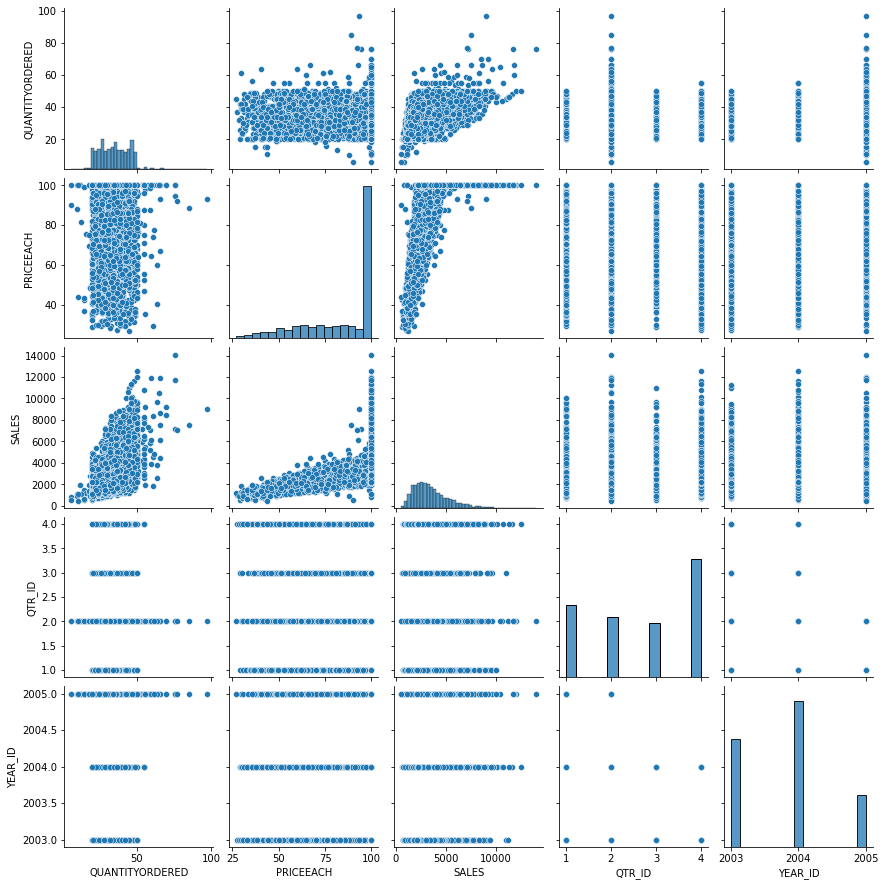

In [14]:
sns.pairplot(df)

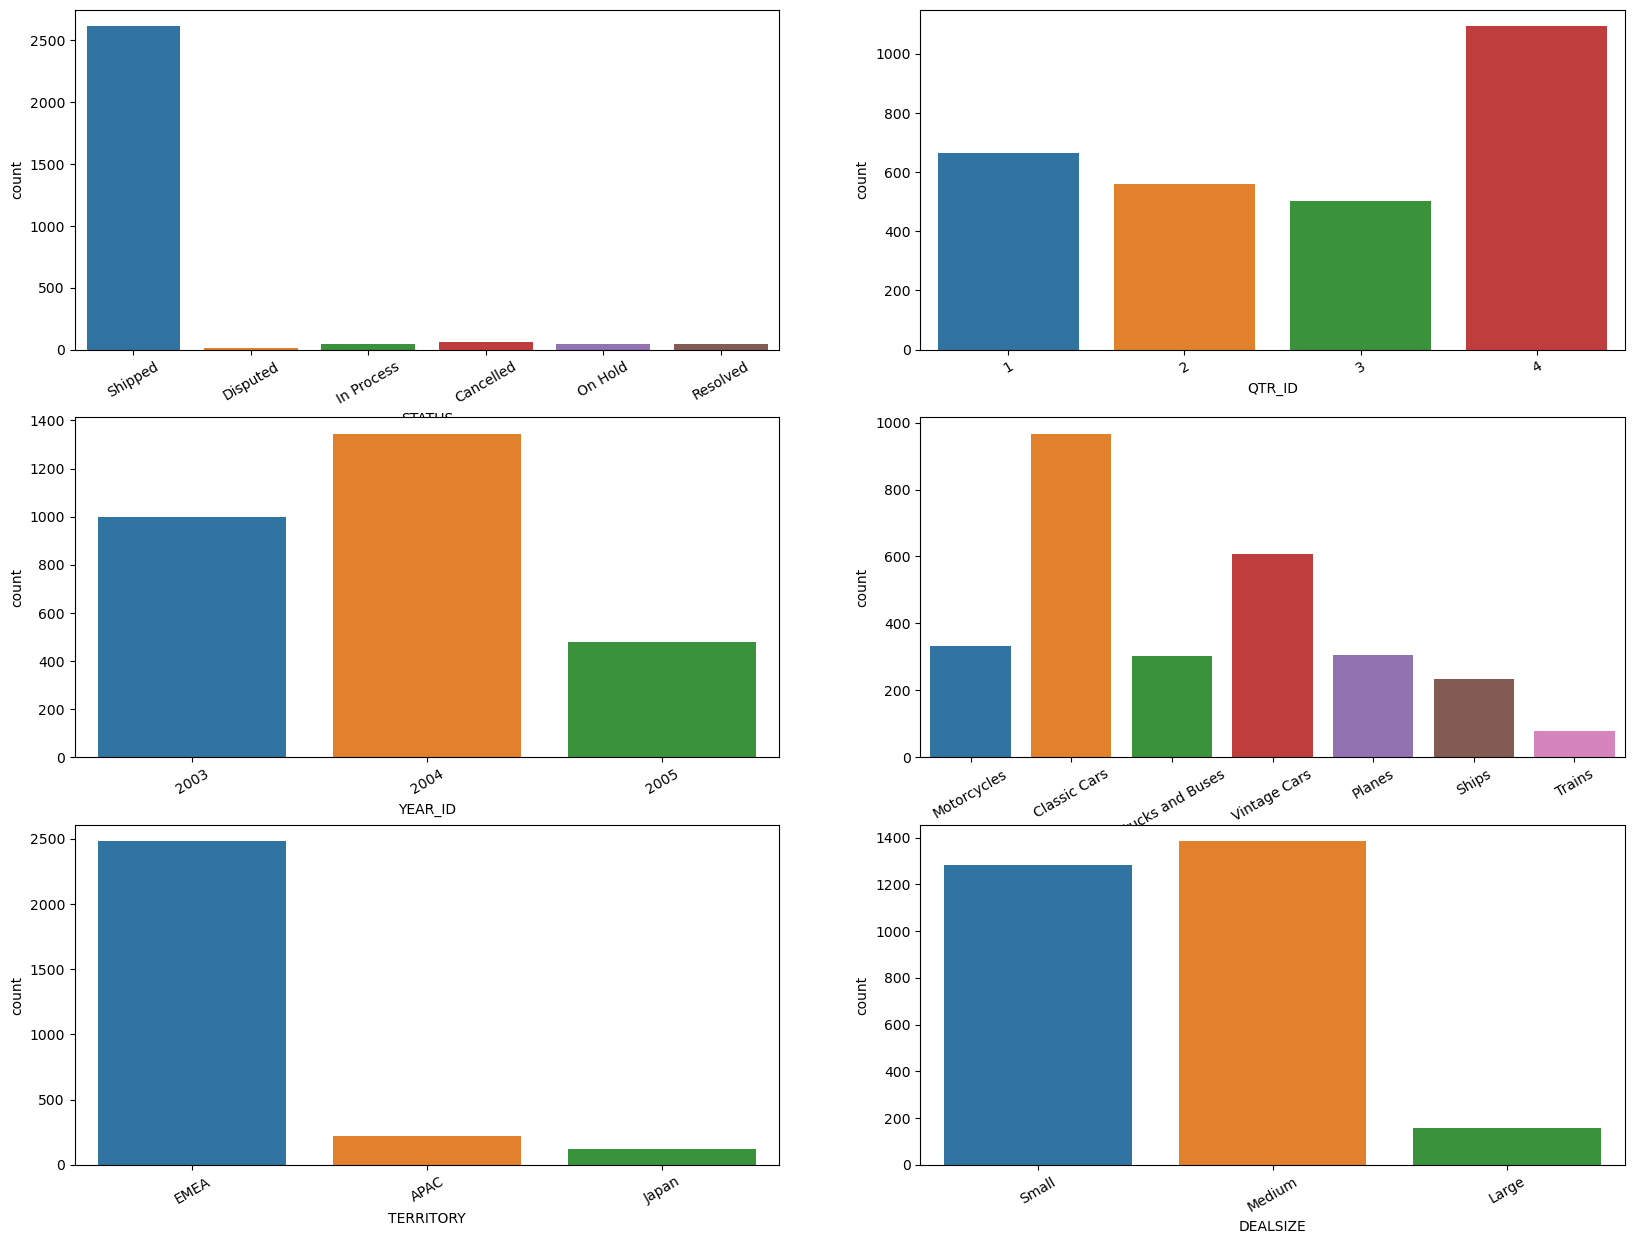

In [15]:
fig = plt.figure(figsize=(20, 15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data=df, x=cat)
    plt.xticks(rotation=30)
plt.show()

From the bar plot above, we can get some insight that are:
- Most of delivery status is shipped
- Most orders were placed in 2004
- Most orders were shipped to EMEA (Europe & Middle East Asia) Territory area
- Most productline that were sold is Classic Cars
- Most of the deal size is medium

#### Create Correlation

<AxesSubplot:>

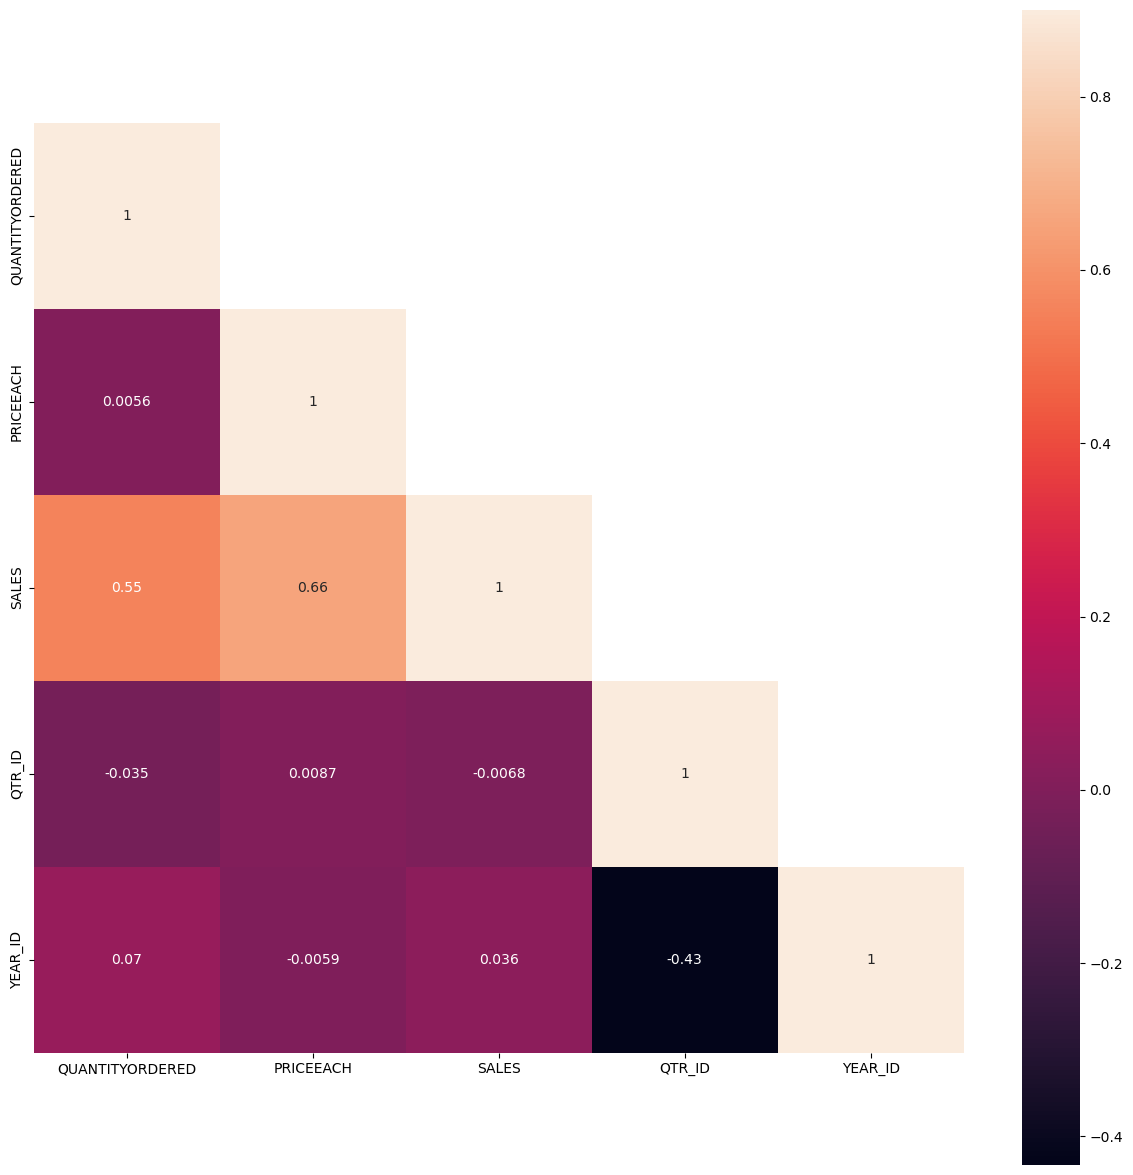

In [16]:
corr = df.corr(method='pearson')

# Convert correlation to numpy array
mask = np.array(corr)

# to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(15, 12))
fig.set_size_inches(15, 15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square=True, annot=True)

From the heatmap above, we can see that the best correlation is between SALES and PRICEEACH

In [17]:
df_cluster = pd.DataFrame()
df_cluster['QUANTITYORDERED'] = df['QUANTITYORDERED']
df_cluster['PRICEEACH'] = df['PRICEEACH']
df_cluster['SALES'] = df['SALES']
df_cluster['QTR_ID'] = df['QTR_ID']
df_cluster.head()

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID
0,30,95.70,2871.00,1
1,34,81.35,2765.90,2
2,41,94.74,3884.34,3
3,45,83.26,3746.70,3
4,49,100.00,5205.27,4


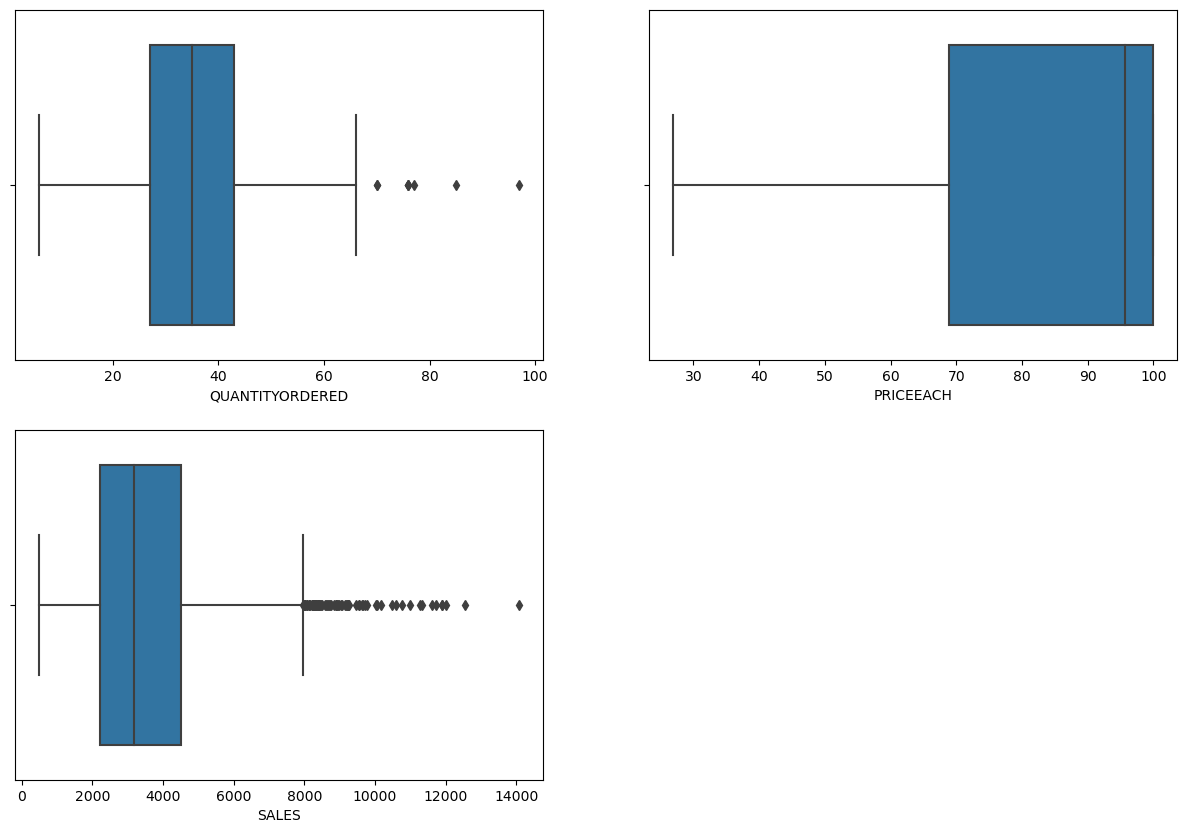

In [18]:
fig = plt.figure(figsize=(15, 10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

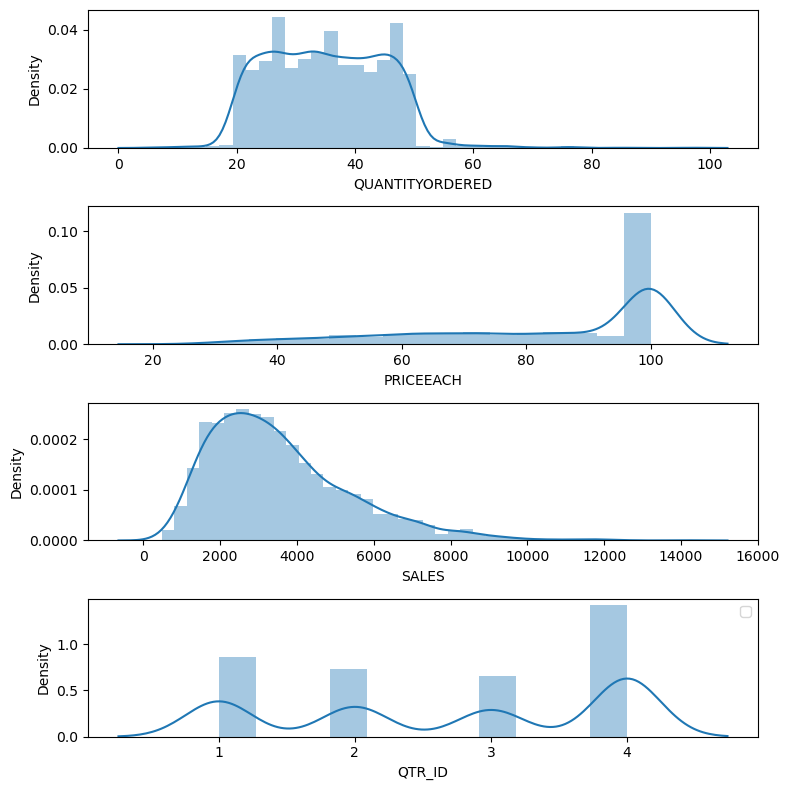

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8,8))
sns.distplot(df['QUANTITYORDERED'], ax=ax1)
sns.distplot(df['PRICEEACH'], ax=ax2)
sns.distplot(df['SALES'], ax=ax3)
sns.distplot(df['QTR_ID'], ax=ax4)
plt.tight_layout()
plt.legend()

### Feature Engineering

#### Reduce Outliers and Distribution Skewness

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

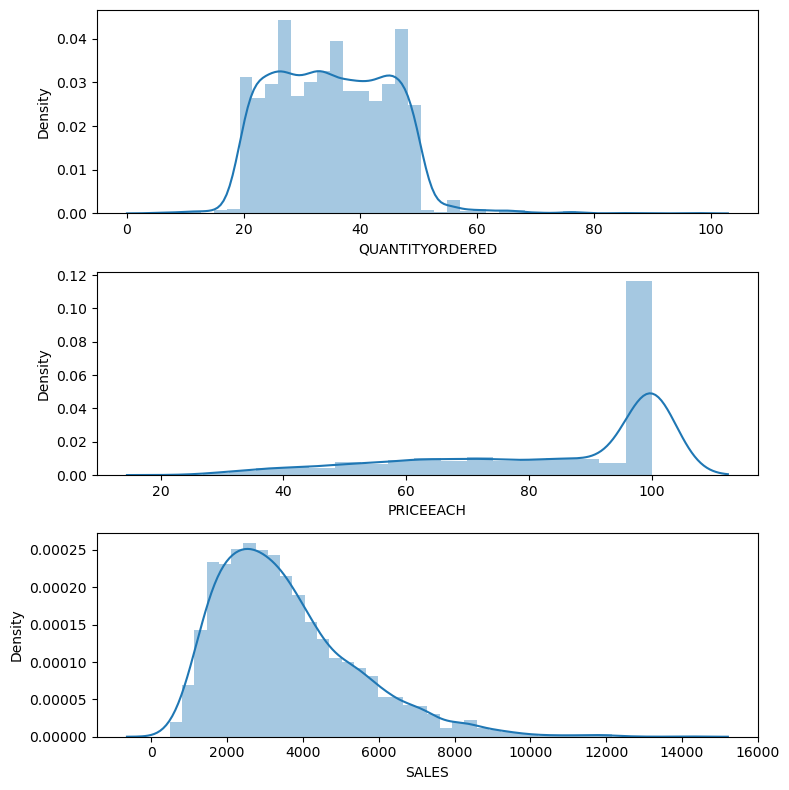

In [20]:
df_cluster_log = np.log(df_cluster[['QUANTITYORDERED', 'PRICEEACH', 'SALES']])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8))
sns.distplot(df['QUANTITYORDERED'], ax=ax1)
sns.distplot(df['PRICEEACH'], ax=ax2)
sns.distplot(df['SALES'], ax=ax3)
plt.tight_layout()

In [21]:
df_cluster_log.head()

,QUANTITYORDERED,PRICEEACH,SALES
0,3.401197,4.561218,7.962416
1,3.526361,4.398761,7.925121
2,3.713572,4.551136,8.264708
3,3.806662,4.421968,8.228631
4,3.891820,4.605170,8.557427


#### Preprocessing the dataset using StandardScaler()

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

#### Apply Hierarchical Agglomerative Clustering

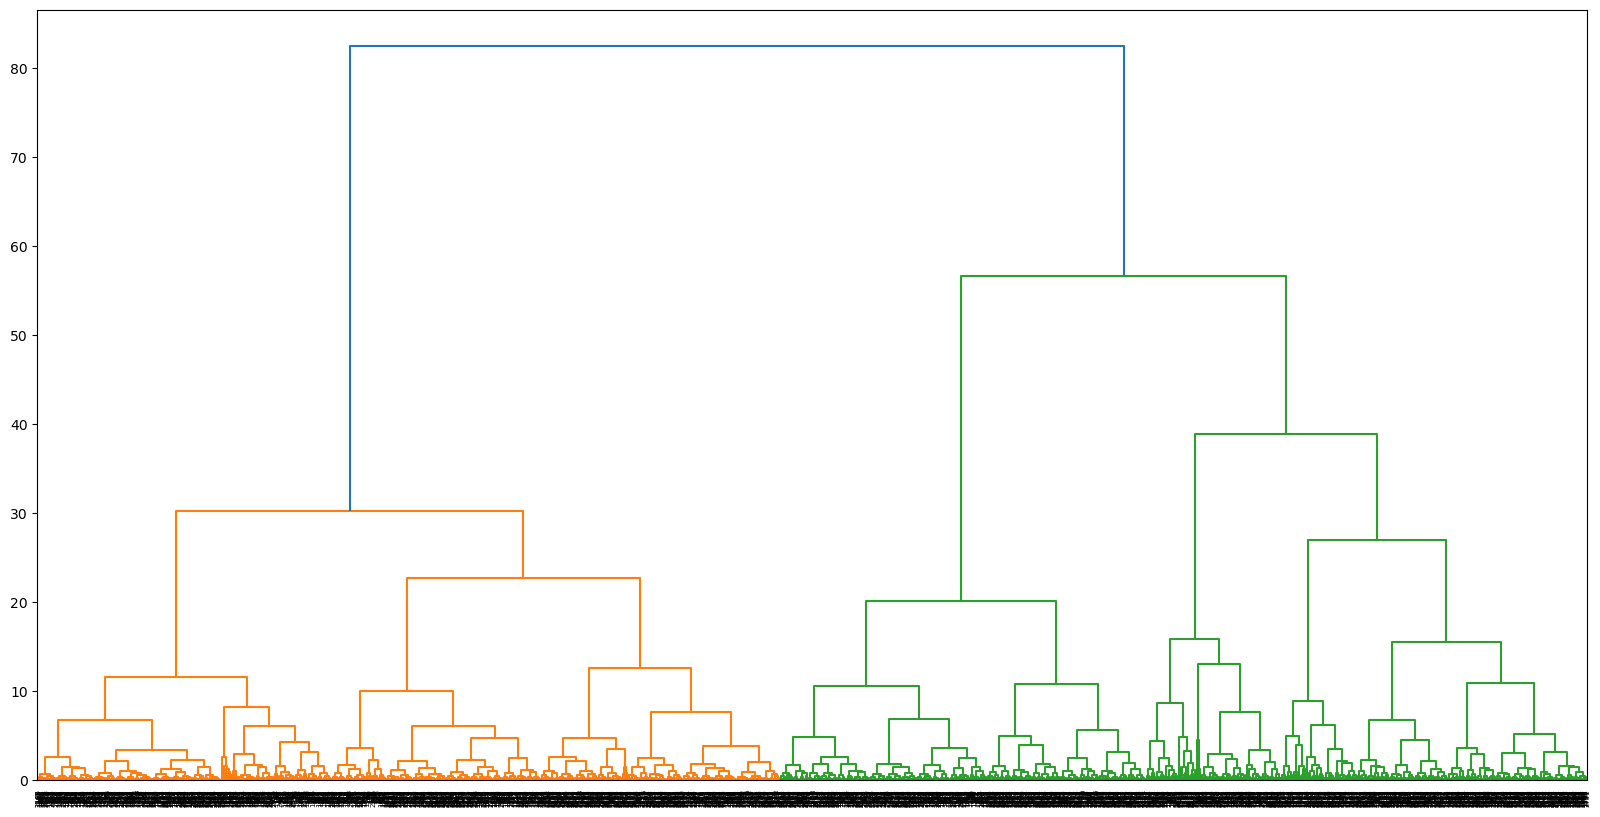

In [23]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

From the dendogram, we can see that the most optimal n_clusters is 2

#### Make the 3D Projection

Hierarchical Agglomerative Clustering


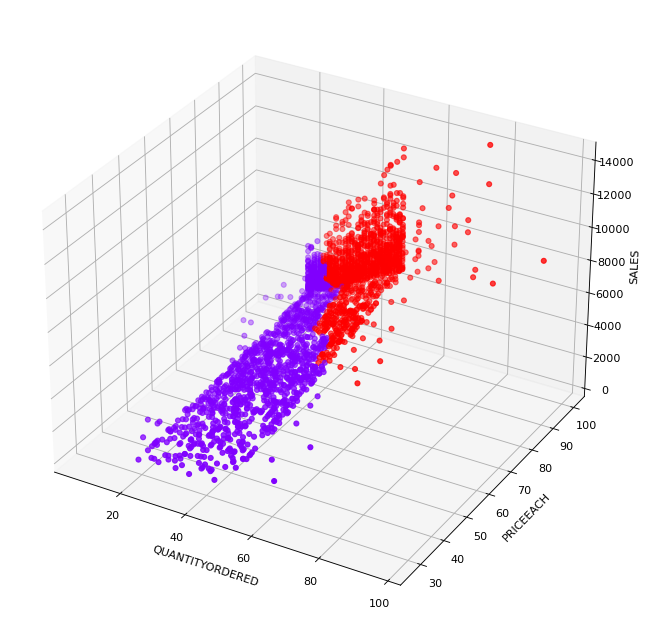

In [24]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
model = AgglomerativeClustering(n_clusters=2)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.scatter3D(df_cluster['QUANTITYORDERED'], df_cluster['PRICEEACH'], df_cluster['SALES'], c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('QUANTITYORDERED', linespacing=3.2)
yLabel = ax.set_ylabel('PRICEEACH', linespacing=3.1)
zLabel = ax.set_zlabel('SALES', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [25]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID
Cluster,,,,
0,30.4,71.9,2248.7,2.7
1,40.2,96.5,4971.9,2.7


The table above shows that centroid of each clusters that could determine the clusters rule. 
These are :
- Cluster 0 : Lower quantity ordered, price each, and sales
- Cluster 1 : Higher quantity ordered, price each, and sales

### The Dendogram

#### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
data = data.drop(['Outcome'], axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Our aim is to make clusters from this data that can segment similar patients together.

#### Check NaN Value

In [28]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

#### Normalize the data

In [29]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


#### Draw The Dendrogram

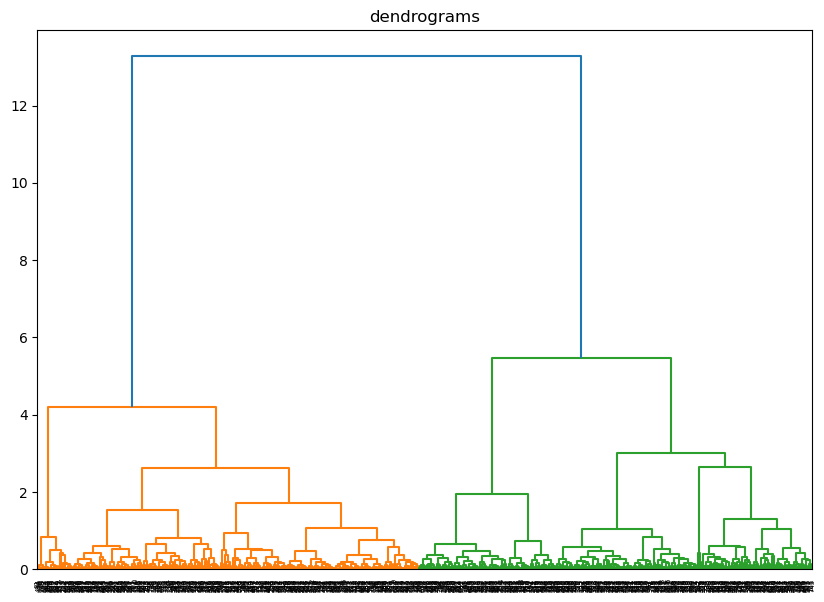

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('dendrograms')
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

- x-axis contains the samples 
- y-axis represents the distance between these samples

#### Decide a threshold of 6 and cut the dendrogram

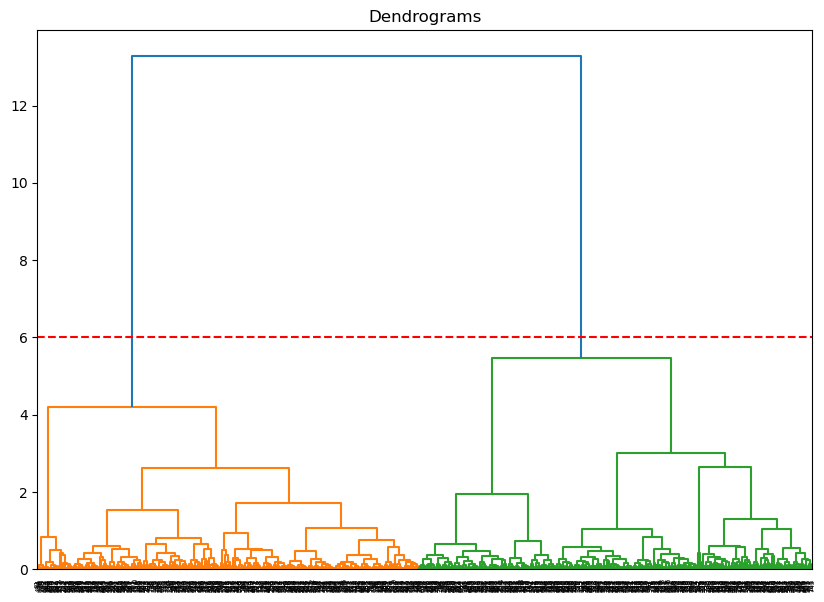

In [35]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

#### Apply Hierarchical Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

#### Visualize the two clusters

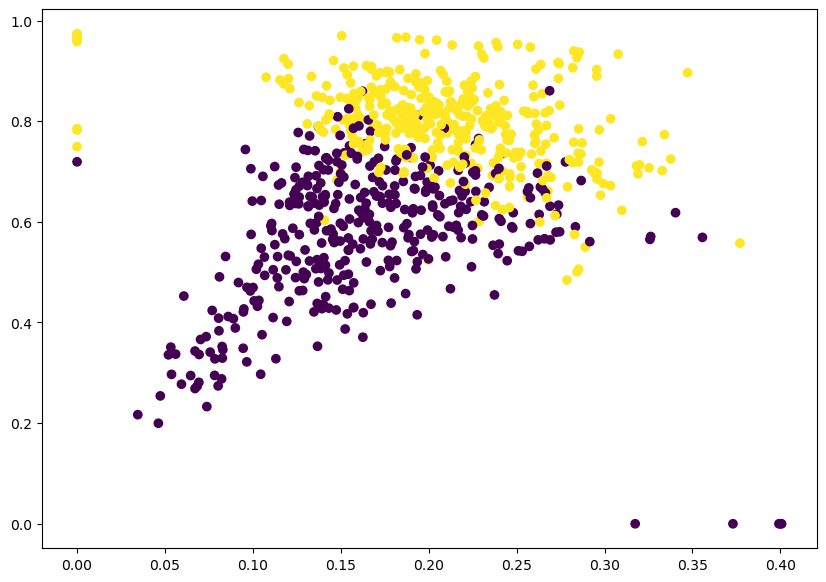

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['BMI'], data_scaled['Glucose'], c=cluster.labels_)

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Saya menggunakan dua dataset untuk melakukan Hierarchical Clustering dengan Agglomerative Clustering. Dataset 1 menggunakan data sales_data_sample, dan dataset2 menggunakan data diabetes. Dataset 1 memiliki data kategorikal dan numerikal. Sedangkan dataset 2 memiliki data numerikal saja.
    - Dari dendogram yang didapati berdasarkan clustering yang dilakukan pada kedua dataset, didapatkan n_cluster sebanyak 2.


---

In [46]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Time-stamp:	2023-05-08 09:33:46.572520


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [47]:
!jupyter nbconvert --to html "./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week10.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week10.ipynb to html
[NbConvertApp] Writing 1803390 bytes to IF540_KelasEL_00000053580_RendyWirawanTamrin_Week10.html
